In [ ]:
import re, os
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import mygene
import bioservices as biosrv
from bioservices import ensembl
import holoviews as hv
from holoviews import opts,dim

: 

In [ ]:
hv.extension('bokeh')

: 

### Reading h5ad

In [8]:
#adata = sc.read_h5ad('/home/raghu/scRNA-seq/glioblastoma_raw.h5ad')
adata = sc.read_h5ad('/home/raghu/Downloads/GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad')

In [9]:
adata

AnnData object with n_obs × n_vars = 1853 × 7683
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis'

In [10]:
adata.obs.head()

,disease_state,plate_id,tissue,patient_id,cell_type,neoplastic_state,diagnosis
index,,,,,,,
GSM2243439,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic
GSM2243444,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic
GSM2243445,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic
GSM2243447,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic
GSM2243452,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic


In [11]:
adata.var.head()

""
index
ENSG00000000005
ENSG00000001561
ENSG00000001629
ENSG00000002587
ENSG00000002933


In [13]:
mg = mygene.MyGeneInfo()

In [14]:
ginfo = mg.querymany(adata.var_names, scopes='ensembl.gene')

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-7683...done.
Finished.
47 input query terms found no hit:
	['ENSG00000130489', 'ENSG00000133808', 'ENSG00000168078', 'ENSG00000170647', 'ENSG00000181013', 'ENS
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [15]:
ginfo = pd.DataFrame(ginfo)[~(pd.DataFrame(ginfo)['notfound'] == True)]

In [16]:
adata.var  = pd.concat([adata.var, ginfo.set_index('query')], axis = 1)
adata.var

,_id,_score,entrezgene,name,symbol,taxid,notfound
ENSG00000000005,64102,25.448362,64102,tenomodulin,TNMD,9606.0,NaN
ENSG00000001561,22875,25.448362,22875,ectonucleotide pyrophosphatase/phosphodiestera...,ENPP4,9606.0,NaN
ENSG00000001629,54467,25.448362,54467,ankyrin repeat and IBR domain containing 1,ANKIB1,9606.0,NaN
ENSG00000002587,9957,25.448362,9957,heparan sulfate-glucosamine 3-sulfotransferase 1,HS3ST1,9606.0,NaN
ENSG00000002933,55365,25.448362,55365,transmembrane protein 176A,TMEM176A,9606.0,NaN
...,...,...,...,...,...,...,...
ENSG00000284609,390271,25.448362,390271,olfactory receptor family 8 subfamily B member 3,OR8B3,9606.0,NaN
ENSG00000284680,26595,25.448362,26595,olfactory receptor family 8 subfamily B member 2,OR8B2,9606.0,NaN
ENSG00000284690,100130520,8.209149,100130520,CD300H molecule (gene/pseudogene),CD300H,9606.0,NaN
ENSG00000284701,388946,25.448362,388946,transmembrane protein 247,TMEM247,9606.0,NaN


In [17]:
adata.var.drop('notfound', axis = 1, inplace = True)

In [18]:
adata.var = adata.var[~(adata.var.isnull())]

In [19]:
adata.var.shape

(7683, 6)

In [20]:
retain_indexes = adata.var[~(adata.var['symbol'].isnull())].index
retain_indexes

Index(['ENSG00000000005', 'ENSG00000001561', 'ENSG00000001629',
       'ENSG00000002587', 'ENSG00000002933', 'ENSG00000003056',
       'ENSG00000003137', 'ENSG00000004478', 'ENSG00000004779',
       'ENSG00000004799',
       ...
       'ENSG00000283980', 'ENSG00000284308', 'ENSG00000284337',
       'ENSG00000284395', 'ENSG00000284516', 'ENSG00000284609',
       'ENSG00000284680', 'ENSG00000284690', 'ENSG00000284701',
       'ENSG00000284723'],
      dtype='object', length=7618)

In [21]:
adata = adata[:, retain_indexes]
adata

View of AnnData object with n_obs × n_vars = 1853 × 7618
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis'
    var: '_id', '_score', 'entrezgene', 'name', 'symbol', 'taxid'

### Assignning Mito

In [22]:
adata.var['MT'] = adata.var['symbol'].apply(lambda x : bool(re.search('ATP',x)))
adata.var

/tmp/ipykernel_45229/2098283190.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['MT'] = adata.var['symbol'].apply(lambda x : bool(re.search('ATP',x)))


,_id,_score,entrezgene,name,symbol,taxid,MT
ENSG00000000005,64102,25.448362,64102,tenomodulin,TNMD,9606.0,False
ENSG00000001561,22875,25.448362,22875,ectonucleotide pyrophosphatase/phosphodiestera...,ENPP4,9606.0,False
ENSG00000001629,54467,25.448362,54467,ankyrin repeat and IBR domain containing 1,ANKIB1,9606.0,False
ENSG00000002587,9957,25.448362,9957,heparan sulfate-glucosamine 3-sulfotransferase 1,HS3ST1,9606.0,False
ENSG00000002933,55365,25.448362,55365,transmembrane protein 176A,TMEM176A,9606.0,False
...,...,...,...,...,...,...,...
ENSG00000284609,390271,25.448362,390271,olfactory receptor family 8 subfamily B member 3,OR8B3,9606.0,False
ENSG00000284680,26595,25.448362,26595,olfactory receptor family 8 subfamily B member 2,OR8B2,9606.0,False
ENSG00000284690,100130520,8.209149,100130520,CD300H molecule (gene/pseudogene),CD300H,9606.0,False
ENSG00000284701,388946,25.448362,388946,transmembrane protein 247,TMEM247,9606.0,False


### Preprocessing 

In [23]:
sc.pp.calculate_qc_metrics(adata, qc_vars = ['MT'], inplace = True)

In [24]:
adata

AnnData object with n_obs × n_vars = 1853 × 7618
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT'
    var: '_id', '_score', 'entrezgene', 'name', 'symbol', 'taxid', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [25]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells = 3)

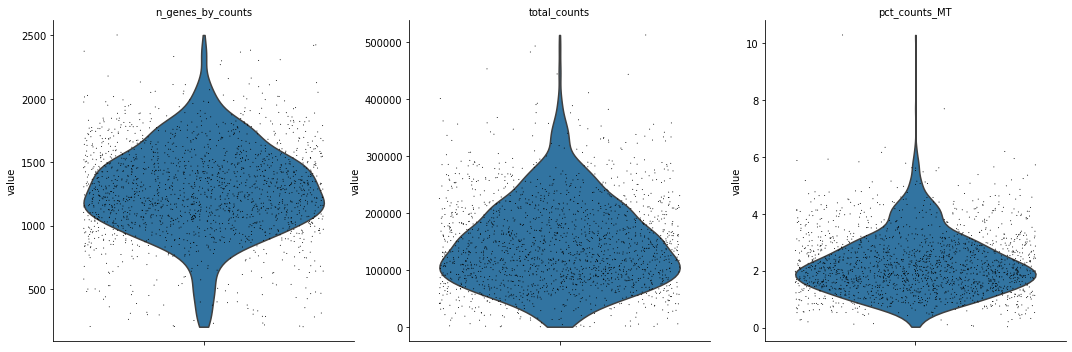

In [27]:
sc.pl.violin(adata,['n_genes_by_counts','total_counts','pct_counts_MT'], jitter = 0.4, multi_panel = True)

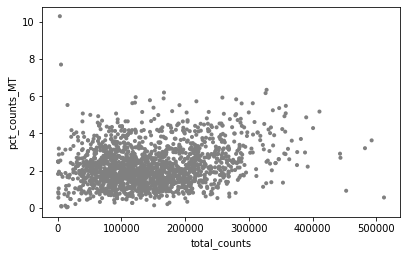

In [28]:
sc.pl.scatter(adata, x = 'total_counts', y = 'pct_counts_MT')

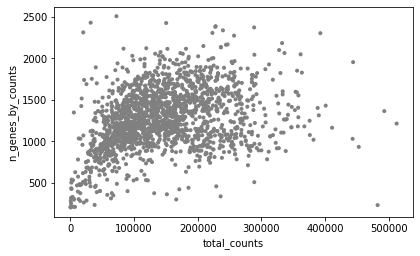

In [29]:
sc.pl.scatter(adata, x = 'total_counts', y = 'n_genes_by_counts')

In [30]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, 0.98)
lower_lim = np.quantile(adata.obs.n_genes_by_counts.values, 0.02)
print(f"{lower_lim} to {upper_lim}")

451.78 to 1996.7600000000002


In [32]:
adata

AnnData object with n_obs × n_vars = 1828 × 6808
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_genes'
    var: '_id', '_score', 'entrezgene', 'name', 'symbol', 'taxid', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

In [33]:
adata = adata[(adata.obs.n_genes_by_counts < upper_lim) & (adata.obs.n_genes_by_counts > lower_lim)]
adata

View of AnnData object with n_obs × n_vars = 1754 × 6808
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_genes'
    var: '_id', '_score', 'entrezgene', 'name', 'symbol', 'taxid', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

In [37]:
adata = adata[adata.obs.pct_counts_MT < 20, :]
adata

View of AnnData object with n_obs × n_vars = 1754 × 6808
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_genes'
    var: '_id', '_score', 'entrezgene', 'name', 'symbol', 'taxid', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

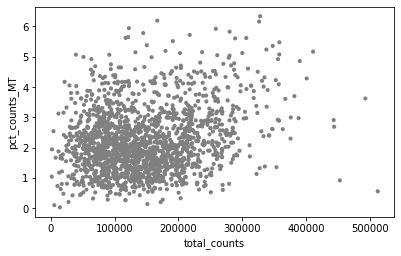

In [38]:
sc.pl.scatter(adata, x = 'total_counts', y = 'pct_counts_MT')

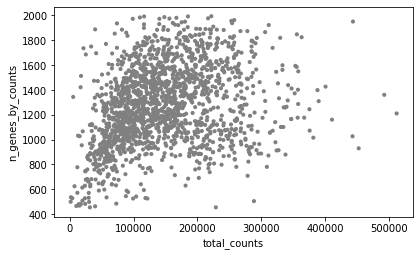

In [39]:
sc.pl.scatter(adata, x = 'total_counts', y = 'n_genes_by_counts')

In [40]:
adata.X.min(), adata.X.max()

(ArrayView(0., dtype=float32), ArrayView(111636.97, dtype=float32))

### Normalization

In [41]:
sc.pp.normalize_total(adata, target_sum = 10000)

/home/raghu/anaconda3/envs/scrnapipl/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [43]:
adata.X.min(), adata.X.max()

(0.0, 2690.6658)

In [44]:
sc.pp.log1p(adata)

### Clustering

In [45]:
sc.pp.highly_variable_genes(adata)

In [48]:
adata.var.head()

,_id,_score,entrezgene,name,symbol,taxid,MT,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
ENSG00000001561,22875,25.448362,22875,ectonucleotide pyrophosphatase/phosphodiestera...,ENPP4,9606.0,False,245,17.581758,2.922180,86.778198,32579.000000,10.391454,245,True,0.775566,3.542344,1.040454
ENSG00000001629,54467,25.448362,54467,ankyrin repeat and IBR domain containing 1,ANKIB1,9606.0,False,715,29.176739,3.407071,61.413923,54064.496094,10.897951,715,False,1.079755,3.175446,0.141534
ENSG00000002587,9957,25.448362,9957,heparan sulfate-glucosamine 3-sulfotransferase 1,HS3ST1,9606.0,False,1268,22.115810,3.140517,31.570426,40980.597656,10.620878,1260,False,0.902401,3.050658,0.120622
ENSG00000002933,55365,25.448362,55365,transmembrane protein 176A,TMEM176A,9606.0,False,548,45.389587,3.837075,70.426336,84106.906250,11.339856,548,False,1.507277,3.368121,0.310930
ENSG00000003056,4074,25.448362,4074,"mannose-6-phosphate receptor, cation dependent",M6PR,9606.0,False,729,69.567177,4.256565,60.658392,128907.976562,11.766862,729,False,1.787226,3.218471,-0.079476


In [49]:
adata.var[adata.var.highly_variable]

,_id,_score,entrezgene,name,symbol,taxid,MT,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
ENSG00000001561,22875,25.448362,22875,ectonucleotide pyrophosphatase/phosphodiestera...,ENPP4,9606.0,False,245,17.581758,2.922180,86.778198,32579.000000,10.391454,245,True,0.775566,3.542344,1.040454
ENSG00000003137,56603,25.448362,56603,cytochrome P450 family 26 subfamily B member 1,CYP26B1,9606.0,False,24,0.686994,0.522948,98.704803,1273.000000,7.149917,24,True,0.051819,2.446355,0.642595
ENSG00000004799,5166,25.448362,5166,pyruvate dehydrogenase kinase 4,PDK4,9606.0,False,646,91.079330,4.522651,65.137615,168770.000000,12.036298,646,True,2.087902,4.112255,0.919409
ENSG00000005073,3207,25.448362,3207,homeobox A11,HOXA11,9606.0,False,18,0.539126,0.431215,99.028602,999.000000,6.907755,18,True,0.023906,2.740422,0.837729
ENSG00000005421,5444,25.448362,5444,paraoxonase 1,PON1,9606.0,False,77,0.501031,0.406152,95.844576,928.410889,6.834551,76,True,0.035362,2.974633,0.993144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000283093,441495,25.448362,441495,centromere protein V like 2,CENPVL2,9606.0,False,10,0.517928,0.417346,99.460335,959.720642,6.867684,10,True,0.030989,3.027311,1.028100
ENSG00000283199,100507747,25.448362,100507747,chromosome 13 open reading frame 46,C13orf46,9606.0,False,77,3.143011,1.421423,95.844576,5824.000000,8.669914,77,True,0.232970,3.628107,1.426770
ENSG00000283439,107983988,25.448362,107983988,SPEM family member 3,SPEM3,9606.0,False,21,1.005397,0.695842,98.866703,1863.000000,7.530480,21,True,0.106931,4.324502,1.888878
ENSG00000283486,100289137,25.448362,100289137,family with sequence similarity 95 member C,FAM95C,9606.0,False,93,1.798009,1.028908,94.981112,3331.710938,8.111542,93,True,0.125156,2.606794,0.749057


In [50]:
adata.raw = adata

In [51]:
adata = adata[:, adata.var.highly_variable]

In [52]:
adata

View of AnnData object with n_obs × n_vars = 1754 × 2115
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_genes'
    var: '_id', '_score', 'entrezgene', 'name', 'symbol', 'taxid', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [53]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_MT'])

In [54]:
adata

AnnData object with n_obs × n_vars = 1754 × 2115
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_genes'
    var: '_id', '_score', 'entrezgene', 'name', 'symbol', 'taxid', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [55]:
sc.pp.scale(adata, max_value = 10)

In [56]:
sc.tl.pca(adata, svd_solver = 'arpack')

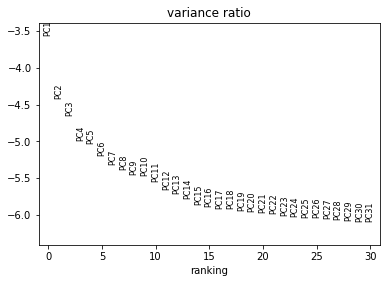

In [57]:
sc.pl.pca_variance_ratio(adata, log=True)

In [58]:
adata

AnnData object with n_obs × n_vars = 1754 × 2115
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_genes'
    var: '_id', '_score', 'entrezgene', 'name', 'symbol', 'taxid', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [59]:
sc.tl.tsne(adata)

/home/raghu/anaconda3/envs/scrnapipl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [60]:
adata

AnnData object with n_obs × n_vars = 1754 × 2115
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_genes'
    var: '_id', '_score', 'entrezgene', 'name', 'symbol', 'taxid', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'tsne'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'

In [61]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs = 17)

In [62]:
sc.tl.umap(adata)

In [63]:
adata

AnnData object with n_obs × n_vars = 1754 × 2115
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_genes'
    var: '_id', '_score', 'entrezgene', 'name', 'symbol', 'taxid', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'tsne', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

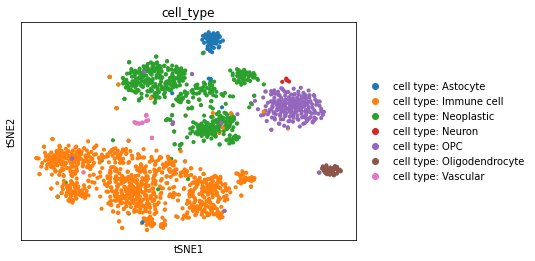

In [66]:
sc.pl.tsne(adata, color = ['cell_type'])

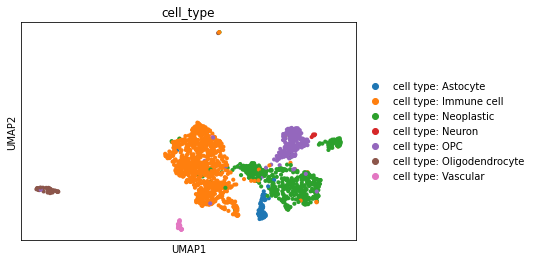

In [67]:
sc.pl.umap(adata, color = ['cell_type'])

In [17]:
#adata.write('/home/raghu/scRNA-seq/glioblastoma.h5ad')

In [22]:
adata_nr = sc.read_h5ad('/home/raghu/scRNA-seq/glioblastoma_normalized.h5ad')
adata = sc.read_h5ad('/home/raghu/scRNA-seq/glioblastoma.h5ad')

In [23]:
adata

AnnData object with n_obs × n_vars = 1754 × 2115
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_genes'
    var: '_id', '_score', 'entrezgene', 'name', 'symbol', 'taxid', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'hvg', 'log1p', 'neighbors', 'patient_id_colors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [24]:
adata_nr

AnnData object with n_obs × n_vars = 1651 × 6852
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts'
    uns: 'pca', 'plate_id_colors'
    obsm: 'X_pca'
    varm: 'PCs'

In [25]:
adata.to_df()

,ENSG00000001561,ENSG00000003137,ENSG00000004799,ENSG00000005073,ENSG00000005421,ENSG00000005513,ENSG00000006116,ENSG00000006194,ENSG00000006530,ENSG00000006831,...,ENSG00000278828,ENSG00000278845,ENSG00000280670,ENSG00000281106,ENSG00000282608,ENSG00000283093,ENSG00000283199,ENSG00000283439,ENSG00000283486,ENSG00000284308
index,,,,,,,,,,,,,,,,,,,,,
GSM2243439,-0.248654,0.002726,-0.272886,-0.083457,-0.130778,2.318376,-0.126215,-0.274693,-0.204573,-0.516351,...,-0.213216,-0.412870,-0.287242,-0.057559,-0.180505,-0.061459,-0.010782,-0.034275,-0.134679,-0.132503
GSM2243444,-0.278370,0.097708,0.127877,-0.181382,-0.153281,-0.300302,-0.058885,-0.276044,-0.261056,0.056940,...,1.013489,-0.627722,0.347565,0.086169,0.126073,-0.076189,0.180144,0.078516,-0.088333,-0.092615
GSM2243445,-0.354716,-0.103484,-0.654737,-0.077093,-0.084354,-0.489487,-0.141884,-0.023952,-0.237350,-0.148388,...,-0.140795,-0.339679,-0.292731,-0.188115,-0.397512,-0.057141,-0.181453,-0.066050,-0.163681,-0.180130
GSM2243452,1.787174,-0.056259,-0.476784,-0.092629,-0.102377,-0.428453,-0.127572,-0.304304,-0.234595,-0.074892,...,-0.191387,-0.392804,-0.300779,-0.126348,-0.285522,-0.060558,-0.100290,-0.040298,-0.147974,-0.159326
GSM2243456,-0.223978,-0.000917,0.144061,-0.062274,-0.133507,-0.266647,-0.138872,2.227829,-0.186196,-0.548323,...,-0.180388,-0.376400,6.808197,-0.068169,-0.213522,-0.058841,-0.025342,-0.054544,-0.140313,-0.133522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2247067,-0.372760,-0.117885,-0.704768,-0.078942,-0.077501,-0.520344,-0.142441,-0.325116,-0.244317,-0.431588,...,-0.134902,-0.334149,-0.295714,-0.205023,-0.423628,-0.056876,-0.203467,-0.067877,-0.167014,-0.186667
GSM2247068,-0.338457,0.667533,-0.762054,-0.045499,-0.079872,-0.477329,-0.162909,-0.314936,-0.216875,3.525081,...,-0.080508,-0.274020,-0.269125,-0.226998,-0.484248,-0.052597,-0.233274,-0.100930,-0.177028,-0.190217
GSM2247069,-0.265665,-0.135618,-0.827914,0.014530,-0.088799,-0.380331,-0.198476,-0.292149,-0.163831,2.012140,...,0.010939,0.634875,-0.220349,-0.253847,-0.572584,-0.045266,-0.270334,-0.157718,-0.192304,-0.191910


In [26]:
adata_nr.to_df()

index,ENSG00000000005,ENSG00000001561,ENSG00000001629,ENSG00000002587,ENSG00000002933,ENSG00000003056,ENSG00000003137,ENSG00000004478,ENSG00000004779,ENSG00000004799,...,ENSG00000283945,ENSG00000283980,ENSG00000284308,ENSG00000284337,ENSG00000284413,ENSG00000284516,ENSG00000284573,ENSG00000284680,ENSG00000284690,ENSG00000284723
index,,,,,,,,,,,,,,,,,,,,,
GSM2243439,0.0,0.000000,0.000000,3.020854,0.000000,6.617663,0.000000,6.087970,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
GSM2243444,0.0,0.000000,0.000000,2.698627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
GSM2243445,0.0,0.000000,5.635476,1.804383,0.000000,6.687523,0.000000,5.156705,6.669262,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
GSM2243452,0.0,5.776676,3.394763,0.000000,0.000000,0.000000,0.000000,5.485060,6.262136,0.000000,...,0.0,0.0,0.0,0.733587,1.758076,0.0,0.0,0.0,0.0,0.000000
GSM2243455,0.0,5.450623,1.427455,2.697661,0.000000,7.173499,0.000000,0.000000,6.408493,0.000000,...,0.0,0.0,0.0,4.184820,0.000000,0.0,0.0,0.0,0.0,4.805196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2247066,0.0,0.000000,0.000000,1.718682,7.040859,0.000000,0.000000,0.000000,0.000000,6.505517,...,0.0,0.0,0.0,3.259229,0.000000,0.0,0.0,0.0,0.0,0.000000
GSM2247067,0.0,0.000000,0.000000,0.000000,0.000000,1.757622,0.000000,3.984994,4.834410,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
GSM2247068,0.0,0.000000,6.757494,0.000000,0.000000,2.092255,2.721712,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.085014,0.000000,0.0,0.0,0.0,0.0,0.000000


In [27]:
adata = adata.raw.to_adata()
adata

AnnData object with n_obs × n_vars = 1754 × 6808
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_genes'
    var: '_id', '_score', 'entrezgene', 'name', 'symbol', 'taxid', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'hvg', 'log1p', 'neighbors', 'patient_id_colors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [30]:
adata.to_df()

,ENSG00000001561,ENSG00000001629,ENSG00000002587,ENSG00000002933,ENSG00000003056,ENSG00000003137,ENSG00000004478,ENSG00000004779,ENSG00000004799,ENSG00000004848,...,ENSG00000283709,ENSG00000283900,ENSG00000283945,ENSG00000283980,ENSG00000284308,ENSG00000284337,ENSG00000284516,ENSG00000284680,ENSG00000284690,ENSG00000284723
index,,,,,,,,,,,,,,,,,,,,,
GSM2243439,0.00000,0.000000,0.178285,0.0,2.137110,0.000000,1.685845,0.000000,0.000000,0.00000,...,0.000000,0.087170,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
GSM2243444,0.00000,0.000000,0.129798,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
GSM2243445,0.00000,1.333308,0.049544,0.0,2.199229,0.000000,1.003178,2.182989,0.000000,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
GSM2243452,1.44087,0.253672,0.000000,0.0,0.000000,0.000000,1.225610,1.831879,0.000000,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.010792,0.0,0.0,0.0,0.0
GSM2243456,0.00000,0.796983,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.578599,0.00000,...,0.083477,0.000000,0.0,0.0,0.0,0.083477,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2247067,0.00000,0.000000,0.000000,0.0,0.046981,0.000000,0.424692,0.811217,0.000000,0.06076,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
GSM2247068,0.00000,2.266655,0.000000,0.0,0.069025,0.133592,0.000000,0.000000,0.000000,0.06995,...,0.000000,0.000000,0.0,0.0,0.0,0.000892,0.0,0.0,0.0,0.0
GSM2247069,0.00000,2.069128,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.931106,0.0,0.0,0.0,0.0


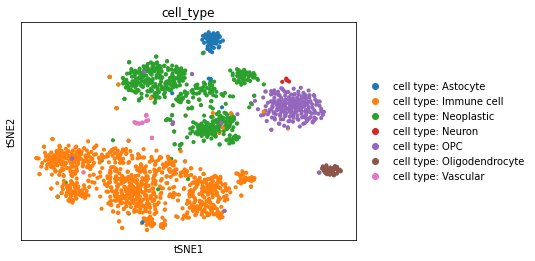

In [6]:
sc.pl.tsne(adata, color = ['cell_type'])

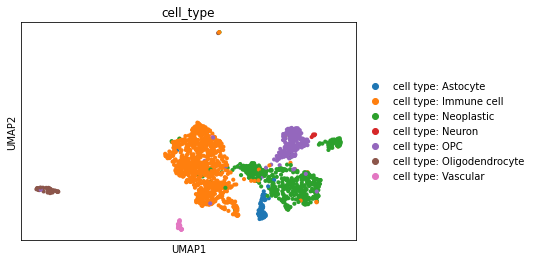

In [7]:
sc.pl.umap(adata, color = ['cell_type'])

In [2]:
adata = sc.read_h5ad('/home/raghu/Downloads/GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad')
adata

/home/raghu/anaconda3/envs/scrnapipl/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 90261 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [3]:
adata.X.min(), adata.X.max()

(0.0, 21078940.0)